# Sentiment & Thematic Analysis
Quantify review sentiment and identify themes to uncover satisfaction drivers and pain points.

### Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

In [24]:
#import dependencies
import pandas as pd

#keyword Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#visuals
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from src.sentiment_analysis import load_data, preprocess_text, get_textblob_sentiment, get_vader_sentiment, get_transformer_sentiment, analyze_sentiment, plot_sentiments, save_results, extract_keywords

## 1. Load & Preprocess Data

In [3]:
# Load cleaned review dataset
df = load_data('../data/clean/cleaned_reviews.csv')

# Apply preprocessing: lowercase, remove punctuation, stopwords, lemmatization
df['cleaned_review'] = df['review'].apply(preprocess_text)

## 2. Sentiment Analysis

### TextBlob

<Axes: xlabel='textblob_sentiment', ylabel='count'>

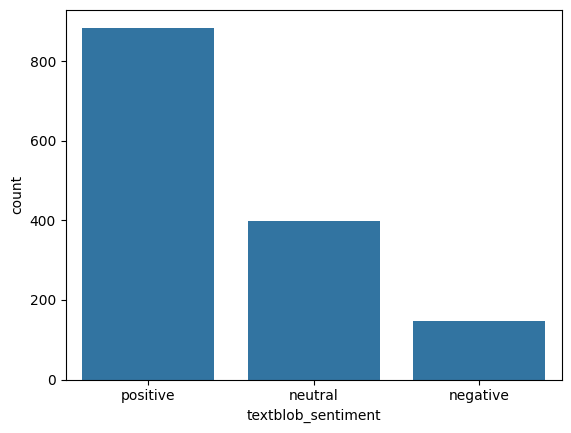

In [5]:
df['textblob_sentiment'] = df['cleaned_review'].apply(get_textblob_sentiment)
sns.countplot(x='textblob_sentiment', data=df)

### VADAR

<Axes: xlabel='vader_sentiment', ylabel='count'>

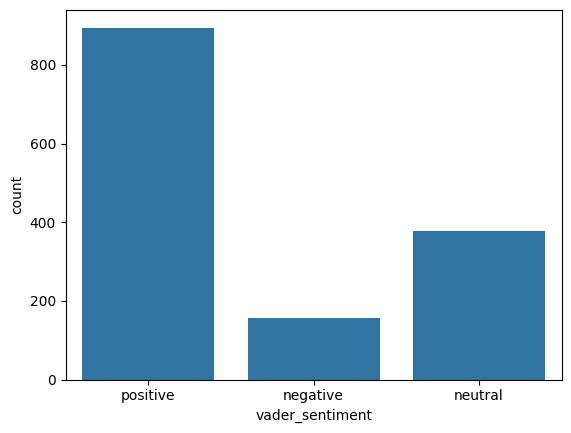

In [6]:
df['vader_sentiment'] = df['cleaned_review'].apply(get_vader_sentiment)
sns.countplot(x='vader_sentiment', data=df)

### DistilBERT (transformer-based)

Device set to use cpu


<Axes: xlabel='transformer_sentiment', ylabel='count'>

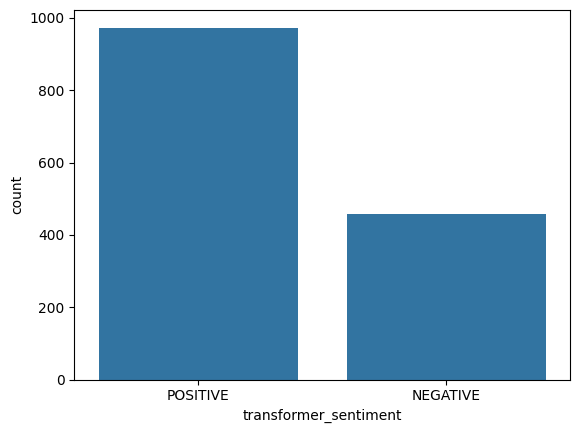

In [9]:
df = get_transformer_sentiment(df, 'cleaned_review')
sns.countplot(x='transformer_sentiment', data=df)

### Analyze Sentiment

Device set to use cpu
<string>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



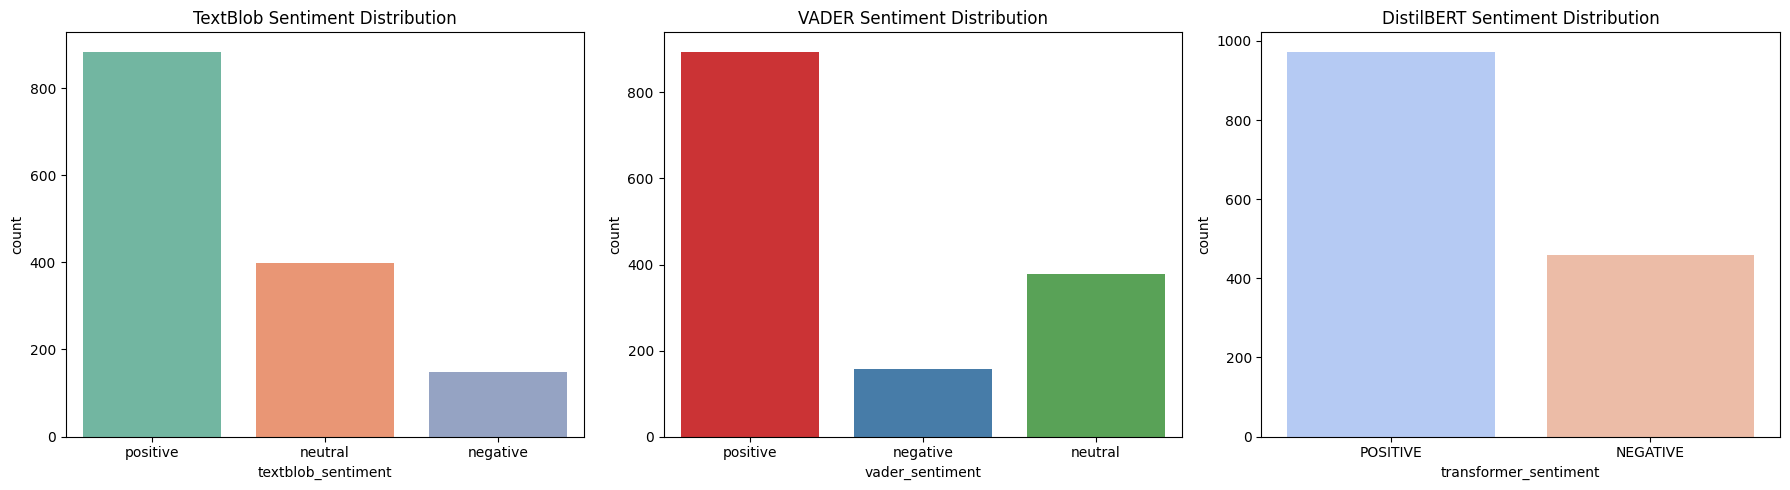

In [15]:
df = analyze_sentiment(df, 'cleaned_review')
## Plot sentiment distributions
plot_sentiments(df)

## 3. Aggregate Sentiment by Bank & Rating

<Axes: xlabel='rating', ylabel='transformer_score'>

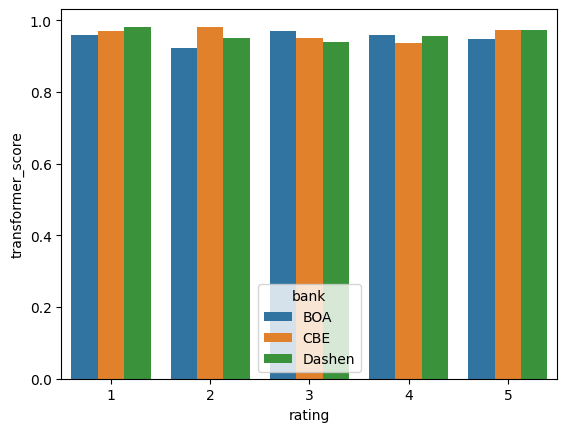

In [16]:
agg = df.groupby(['bank', 'rating'])['transformer_score'].mean().reset_index()
sns.barplot(x='rating', y='transformer_score', hue='bank', data=agg)

## 4. Keyword Extraction (TF-IDF)

### Positive vs. Negative Split

In [25]:
positive_reviews = df[df['transformer_sentiment'] == 'positive']
negative_reviews = df[df['transformer_sentiment'] == 'negative']
# positive_reviews = df[df['sentiment'] == 'positive']['processed_review']
# negative_reviews = df[df['sentiment'] == 'negative']['processed_review']

### Extract Keywords

In [27]:
positive_keywords = extract_keywords(positive_reviews['cleaned_text'])
negative_keywords = extract_keywords(negative_reviews['cleaned_text'])

ValueError: empty vocabulary; perhaps the documents only contain stop words

## 5. Visualizations

### Word Clouds for Keywords

In [ ]:
plot_wordcloud(positive_keywords, "Positive Review Keywords")
plot_wordcloud(negative_keywords, "Negative Review Keywords")